In [1]:
import pandas as pd
import datetime as dt

In [107]:
train_df = pd.read_csv('train_aox2Jxw/train.csv')

In [108]:
test_df = pd.read_csv('test_bqCt9Pv.csv')

In [109]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [110]:
test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [111]:
train_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

### Feature correlation

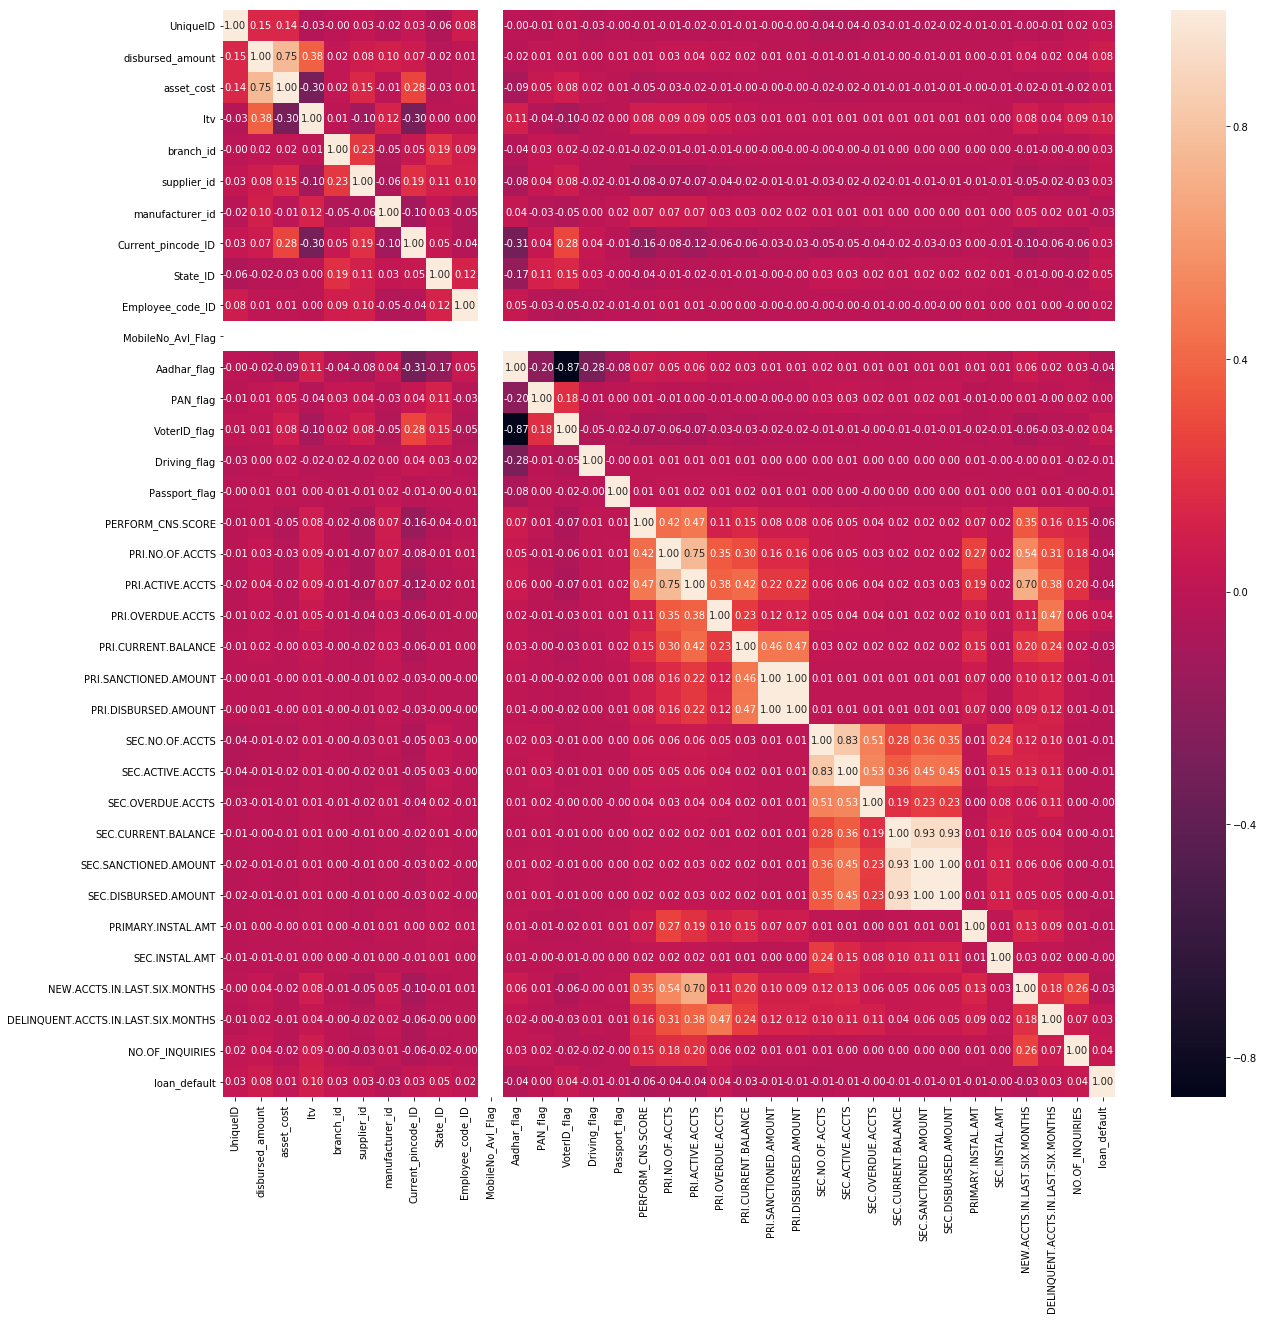

In [115]:
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")

plt.show()

In [30]:
# train_df.isna().sum()

In [41]:
# test_df.isna().sum()
train_df['SEC.INSTAL.AMT'].describe()

count    2.331540e+05
mean     3.232684e+02
std      1.555369e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.170901e+06
Name: SEC.INSTAL.AMT, dtype: float64

## Find target variable where sec.instal.amt is more

In [56]:
train_df[train_df['SEC.INSTAL.AMT']>train_df['PRIMARY.INSTAL.AMT']].groupby('loan_default')['loan_default'].count()

loan_default
0    1237
1     293
Name: loan_default, dtype: int64

In [57]:
train_df[train_df['SEC.INSTAL.AMT']<train_df['PRIMARY.INSTAL.AMT']].groupby('loan_default')['loan_default'].count()

loan_default
0    57450
1    15618
Name: loan_default, dtype: int64

In [59]:
def is_more(a,b):
    if a>b:
        return 1
    return 0

In [60]:
train_df['sec_greater']=train_df.apply(lambda x: is_more(x['SEC.INSTAL.AMT'], x['PRIMARY.INSTAL.AMT']), axis=1)

In [61]:
test_df['sec_greater']=test_df.apply(lambda x: is_more(x['SEC.INSTAL.AMT'], x['PRIMARY.INSTAL.AMT']), axis=1)

In [10]:
train_df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [11]:
test_df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [12]:
set(train_df['UniqueID']).intersection(test_df['UniqueID'])

set()

In [13]:
set(test_df['branch_id'])-set(train_df['branch_id'])

set()

In [14]:
set(test_df['manufacturer_id'])-set(train_df['manufacturer_id'])

{155}

### Handling of date columns

In [15]:
train_df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'])
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'])

In [16]:
train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'])
test_df['DisbursalDate'] = pd.to_datetime(test_df['DisbursalDate'])

In [17]:
NOW=dt.datetime(2017,12,6)

In [18]:
train_df['Date.of.Birth'] = abs(train_df['Date.of.Birth']-NOW).dt.days//365

In [19]:
test_df['Date.of.Birth'] = abs(test_df['Date.of.Birth']-NOW).dt.days//365

In [20]:
train_df['DisbursalDate'] = abs(train_df['DisbursalDate']-NOW)
test_df['DisbursalDate'] = abs(test_df['DisbursalDate']-NOW)

In [21]:
train_df['DisbursalDate'] = train_df['DisbursalDate'].dt.days 
test_df['DisbursalDate'] = test_df['DisbursalDate'].dt.days 

In [22]:
def con(xx):
    #  convert date month to int
    xx = xx.split()
    yr = xx[0].replace('yrs','')
    
    mn = xx[1].replace('mon','')
    return int(yr)*365+int(mn)*30

In [23]:
train_df['AVERAGE.ACCT.AGE'] = train_df['AVERAGE.ACCT.AGE'].apply(lambda x: con(x))
train_df['CREDIT.HISTORY.LENGTH'] = train_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: con(x))

In [25]:
test_df['AVERAGE.ACCT.AGE'] = test_df['AVERAGE.ACCT.AGE'].apply(lambda x: con(x))
test_df['CREDIT.HISTORY.LENGTH'] = test_df['CREDIT.HISTORY.LENGTH'].apply(lambda x: con(x))

In [26]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

### Remove highly collinear features

In [28]:
train_df['combined_flag'] = train_df['MobileNo_Avl_Flag']+train_df['Aadhar_flag']+train_df['PAN_flag']+train_df['VoterID_flag']+train_df['Driving_flag']+train_df['Passport_flag']
test_df['combined_flag'] = test_df['MobileNo_Avl_Flag']+test_df['Aadhar_flag']+test_df['PAN_flag']+test_df['VoterID_flag']+test_df['Driving_flag']+test_df['Passport_flag']

In [29]:
train_df = train_df.drop(['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], axis=1)
test_df = test_df.drop(['MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], axis=1)

In [63]:
y = train_df.loan_default
X = train_df.drop(['UniqueID','loan_default'], axis=1)
test = test_df.drop(['UniqueID'], axis=1)

## Split 80-20

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Categorical features

In [65]:
cat_features = ['branch_id', 'supplier_id', 'manufacturer_id', 'State_ID', 'Employee_code_ID', 'Current_pincode_ID','Employment.Type', 'sec_greater','PERFORM_CNS.SCORE.DESCRIPTION']

### Class imbalance ratio

In [79]:
train_df.shape

(233154, 37)

In [87]:
train_df.groupby(['loan_default'])['loan_default'].sum()

loan_default
0        0
1    50611
Name: loan_default, dtype: int64

In [88]:
class_imbalance_ratio = (233154-50611)/50611

In [97]:
class_imbalance_ratio

3.606785086246073

## Catboost classifier

In [98]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    loss_function='Logloss',
    custom_loss=['AUC'],
    use_best_model=True,
    task_type='GPU',
    early_stopping_rounds=50,
    class_weights = [1, 2.7]
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.6864402	test: 0.6857596	best: 0.6857596 (0)	total: 67.5ms	remaining: 1m 7s
1:	learn: 0.6806938	test: 0.6797302	best: 0.6797302 (1)	total: 131ms	remaining: 1m 5s
2:	learn: 0.6760669	test: 0.6745350	best: 0.6745350 (2)	total: 200ms	remaining: 1m 6s
3:	learn: 0.6721775	test: 0.6703620	best: 0.6703620 (3)	total: 259ms	remaining: 1m 4s
4:	learn: 0.6688270	test: 0.6669328	best: 0.6669328 (4)	total: 324ms	remaining: 1m 4s
5:	learn: 0.6660624	test: 0.6638363	best: 0.6638363 (5)	total: 384ms	remaining: 1m 3s
6:	learn: 0.6635780	test: 0.6611969	best: 0.6611969 (6)	total: 447ms	remaining: 1m 3s
7:	learn: 0.6615063	test: 0.6588700	best: 0.6588700 (7)	total: 510ms	remaining: 1m 3s
8:	learn: 0.6597429	test: 0.6569752	best: 0.6569752 (8)	total: 570ms	remaining: 1m 2s
9:	learn: 0.6579862	test: 0.6552117	best: 0.6552117 (9)	total: 625ms	remaining: 1m 1s
10:	learn: 0.6565747	test: 0.6535530	best: 0.6535530 (10)	total: 688ms	remaining: 1m 1s
11:	learn: 0.6552092	test: 0.6521631	best: 0.652163

In [91]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics
from catboost import *

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
# roc_auc = sklearn.metrics.auc(fpr, tpr)

In [77]:
# roc_auc

In [105]:
model.predict_proba(test)

array([[0.51401193, 0.48598807],
       [0.43849535, 0.56150465],
       [0.48242708, 0.51757292],
       ...,
       [0.5934094 , 0.4065906 ],
       [0.43639886, 0.56360114],
       [0.70887388, 0.29112612]])

In [102]:
xx[:,1] 

array([0.37767108, 0.50863604, 0.33383752, ..., 0.21721504, 0.42498124,
       0.46445283])

In [95]:
model.predict(test)

array([1., 1., 1., ..., 1., 1., 0.])

In [103]:
submission = pd.DataFrame()
submission['UniqueID'] = test_df.UniqueID
submission['loan_default'] = list(model.predict_proba(test)[:,1])
submission.to_csv('submission_early_stopping_16_2.csv', index=False)

In [74]:
# model.get_feature_importance()

### Light GBM